## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
plt.style.use('ggplot')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
data["Mouse ID"].nunique()

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for time in data["Timepoint"].unique():
    counts = data[data["Timepoint"] == time]["Mouse ID"].value_counts()
    non_uniques = counts[counts > 1]
    if non_uniques.size > 0:
        print(f"{time} days: {non_uniques.index.values}")
    else:
        print(f"{time} days: no duplicates")

    

0 days: ['g989']
5 days: ['g989']
10 days: ['g989']
15 days: ['g989']
20 days: ['g989']
25 days: no duplicates
30 days: no duplicates
35 days: no duplicates
40 days: no duplicates
45 days: no duplicates


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[data["Mouse ID"] != "g989"] 
#could also use .drop() method, but that references index and not Mouse ID as instructed

In [21]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

grouped = clean_data.groupby("Drug Regimen")
tumor = grouped["Tumor Volume (mm3)"]

summary_table = {"Mean": tumor.mean(),
                "Median": tumor.median(),
                "Variance": tumor.var(),
                "Standard Deviation": tumor.std(),
                "SEM": tumor.sem()}

summary = pd.DataFrame(summary_table)
summary = summary.reset_index() # make regimen into column instead of index

summary

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

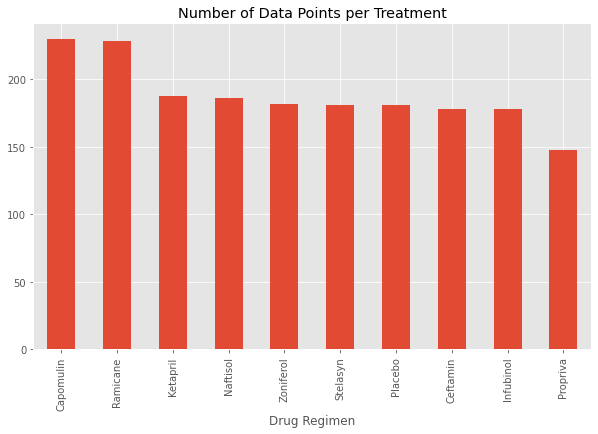

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
# using pandas
bars = clean_data["Drug Regimen"].value_counts() # get bar chart data

fig_bar_pd, ax_bar_pd = plt.subplots(figsize = (10, 6))
pd.DataFrame(bars).plot(kind="bar", ax=ax_bar_pd)

# formatting
ax_bar_pd.set(title = "Number of Data Points per Treatment",
             xlabel = "Drug Regimen")
ax_bar_pd.get_legend().remove()


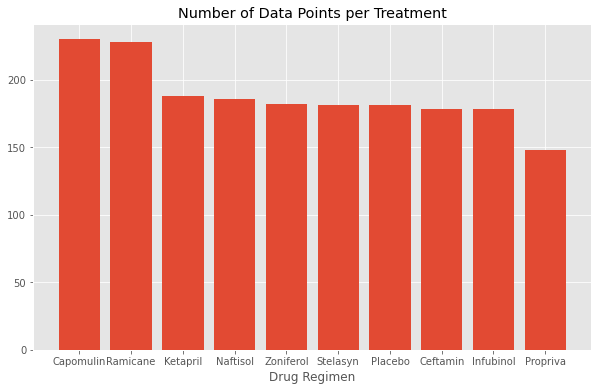

In [68]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study \
# using pyplot

fig_bar_pp, ax_bar_pp = plt.subplots(figsize = (10, 6)) 
ax_bar_pp.bar(bars.index, bars);

# formatting
ax_bar_pp.set(title = "Number of Data Points per Treatment",
             xlabel = "Drug Regimen");

# I have no idea why the bars are so much wider on this version and I do not care enough to fix it

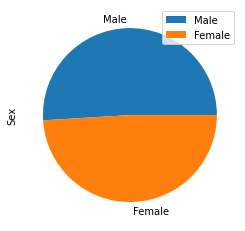

In [31]:
# Generate a pie plot showing the distribution of female versus male mice 
# using pandas
pie_data = clean_data["Sex"].value_counts()

fig_pie_pd, ax_pie_pd = plt.subplots()
pd.DataFrame(pie_data).plot(y="Sex",kind="pie", ax=ax_pie_pd);




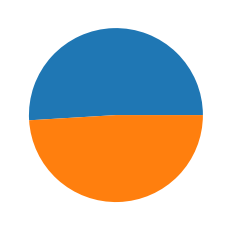

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig_pie, ax_pie = plt.subplots()
ax_pie.pie(pie_data);


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_data = clean_data.copy()
    
i = 0
# note that this while loop requires that the dataframe is sorted by mouse ID
# and then by timepoint in ascending order
while len(max_data) > i + 1: 
    curr_max = max_data["Timepoint"][i] # timepoint of current row
    next_max = max_data["Timepoint"][i + 1] # timepoint of next row
    
    if curr_max < next_max: # if this mouse lived to the next timepoint
        max_data = max_data.drop(i) # drop current row
        max_data = max_data.reset_index(drop=True) # so max_data indexes from 0 again
        
    else:
        i += 1 # leave this row and move on to the next

max_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [35]:
# Taking out only Capomulin, Ramicane, Infubinol, and Ceftamin
reg = max_data["Drug Regimen"] # for the sake of brevity below

# break each into individual data frames
# there is definitely a more elegant way to do this
cap = max_data[reg == "Capomulin"]
ram = max_data[reg == "Ramicane"]
inf = max_data[reg == "Infubinol"]
cef = max_data[reg == "Ceftamin"]

# merge those four data frames together
reg_comb = pd.merge(cap, ram, how="outer")
reg_comb = pd.merge(reg_comb, inf, how="outer")
reg_comb = pd.merge(reg_comb, cef, how="outer")

reg_comb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# group by treatment and put quantiles in data frame
by_treatment = reg_comb.groupby("Drug Regimen")
q_T = by_treatment['Tumor Volume (mm3)'].quantile([.25,.5,.75])
q_T = pd.DataFrame(q_T).reset_index()

In [43]:
quantile_list = []

# loop through treatments and pull out quantile data
for drug in treatments:
    # select the current treatment's data
    reg = q_T[q_T["Drug Regimen"] == drug]
    
    # pull out each quantile
    # Better way to do this - maybe loc or iloc?
    lower = float(reg[reg["level_1"] == .25]["Tumor Volume (mm3)"])
    upper = float(reg[reg["level_1"] == .75]["Tumor Volume (mm3)"])
    mid = float(reg[reg["level_1"] == .50]["Tumor Volume (mm3)"])
    
    # calculate IQR
    iqr = upper - lower

    # put variables into dict and add to quantile_summary list
    curr_dict = {"Drug": drug, "LowerQ": lower, "UpperQ": upper, "IQR": iqr, "Mid": mid}
    quantile_list.append(curr_dict)

# make list of dicts into a dataframe
quantiles = pd.DataFrame(quantile_list)

quantiles

,Drug,LowerQ,UpperQ,IQR,Mid
0,Capomulin,32.377357,40.159220,7.781863,38.125164
1,Ramicane,31.560470,40.659006,9.098537,36.561652
2,Infubinol,54.048608,65.525743,11.477135,60.165180
3,Ceftamin,48.722078,64.299830,15.577752,59.851956


In [46]:
# checking for outliers in each regimen

for drug in treatments:
    # pull quantiles(again - loc and iloc?)
    iqr_curr = float(quantiles[quantiles["Drug"] == drug]["IQR"])
    low_curr = float(quantiles[quantiles["Drug"] == drug]["LowerQ"])
    high_curr = float(quantiles[quantiles["Drug"] == drug]["UpperQ"])
    
    # calculate bounds of potential outliers
    low_bound = low_curr - 1.5 * iqr_curr
    high_bound = high_curr + 1.5 * iqr_curr
    
    # get mouse data for current treatment
    curr_frame = reg_comb[reg_comb["Drug Regimen"] == drug]
    
    # make dataframes of low / high outliers
    low_outs = curr_frame[curr_frame["Tumor Volume (mm3)"] < low_bound]
    high_outs = curr_frame[curr_frame["Tumor Volume (mm3)"] > high_bound]

    # and print those outliers if there are any
    if len(low_outs) > 0:
        print(low_outs.values)
    if len(high_outs) > 0:
        print(high_outs.values)


[['c326' 'Infubinol' 'Female' 18 25 5 36.321345799999996 0]]


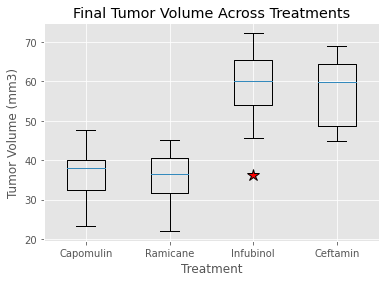

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volumes = [cap["Tumor Volume (mm3)"], 
                 ram["Tumor Volume (mm3)"],
                 inf["Tumor Volume (mm3)"], 
                 cef["Tumor Volume (mm3)"]]
# Efficiency note: take list [cap, inf, cef, ram] and loop through it rather than filtering from reg_combs each time?

fig_box, ax_box = plt.subplots()

# set style of outlier
flierprops = dict(marker='*', markerfacecolor='red', markersize=12,
                  linestyle='none')

ax_box.boxplot(tumor_volumes, labels=treatments, flierprops=flierprops)
ax_box.set(xlabel = "Treatment", 
           ylabel = "Tumor Volume (mm3)", 
           title = "Final Tumor Volume Across Treatments");


## Line and Scatter Plots

[Text(0, 0.5, 'Tumor Volume (mm3)'),
 Text(0.5, 0, 'Time (days)'),
 Text(0.5, 1.0, 'Tumor Volume over Time for s185')]

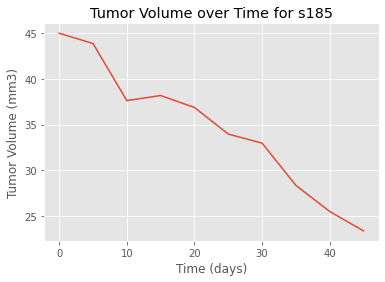

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# get data for mouse s185
s185_data = clean_data[clean_data["Mouse ID"] == "s185"]

# set axes
x_axis = s185_data["Timepoint"]
y_axis = s185_data["Tumor Volume (mm3)"]

# plot
fig_line, ax_line = plt.subplots()
ax_line.plot(x_axis, y_axis)

# format
ax_line.set(xlabel = "Time (days)",
           ylabel = "Tumor Volume (mm3)",
           title = "Tumor Volume over Time for s185");


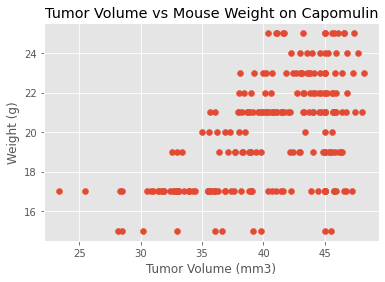

In [75]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regime

# NOTE: Instructions unclear on what "average tumor volume" means and whether only the final
# tumor volume value should be included, or whether this is across all time points. I went 
# with implementing the latter.

# get all capomulin data
full_cap = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# pull tumor volume and weight
x_scatter = full_cap["Tumor Volume (mm3)"]
y_scatter = full_cap["Weight (g)"]

# plot
fig_scatter, ax_scatter = plt.subplots()
ax_scatter.scatter(x_scatter, y_scatter)

#format
ax_scatter.set(xlabel = "Tumor Volume (mm3)",
              ylabel = "Weight (g)",
              title = "Tumor Volume vs Mouse Weight on Capomulin");


## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r, p, std_err = st.linregress(x_scatter, y_scatter)

print(f"Slope of best fit line: {round(slope,4)} \n",
     f"Correlation coefficient: {round(r,4)} \n",
     f"p-value: {p}")


Slope of best fit line: 0.2876 
 Correlation coefficient: 0.5257 
 p-value: 9.605446629502282e-18
